Data read and info

In [34]:
import pandas as pd
df=pd.read_csv("PS_20174392719_1491204439457_log.csv")
print(df.dtypes)

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object


In [35]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [36]:
df.shape

(6362620, 11)

In [37]:
# Eksik değer kontrolü
print(df.isna().sum())

# Negatif veya sıfır amount kontrolü
print("Sıfır veya negatif işlem sayısı:", (df['amount'] <= 0).sum())


step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64
Sıfır veya negatif işlem sayısı: 16


In [38]:
df['type'].value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

C:\Users\ASUS\AppData\Local\Temp\ipykernel_4996\2171240637.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="type", data=df, palette="deep", order=df["type"].value_counts().index)


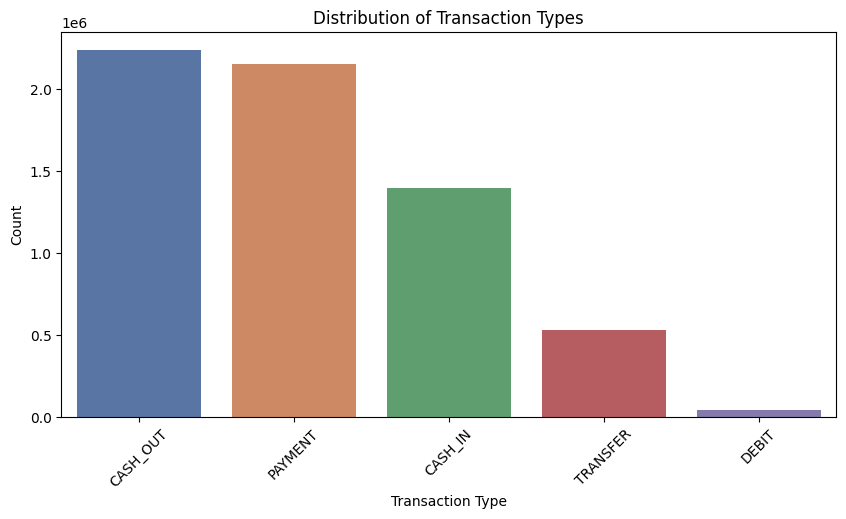

In [39]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.countplot(x="type", data=df, palette="deep", order=df["type"].value_counts().index)
plt.xticks(rotation=45)
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.title("Distribution of Transaction Types")
plt.show()

In [40]:
correlation = df.select_dtypes(include=['int64','float64']).corr()
correlation["isFraud"].sort_values(ascending=False)


isFraud           1.000000
amount            0.076688
isFlaggedFraud    0.044109
step              0.031578
oldbalanceOrg     0.010154
newbalanceDest    0.000535
oldbalanceDest   -0.005885
newbalanceOrig   -0.008148
Name: isFraud, dtype: float64

isFraud
0    6354407
1       8213
Name: count, dtype: int64


C:\Users\ASUS\AppData\Local\Temp\ipykernel_4996\3638811453.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_counts.index, y=fraud_counts.values, palette="magma")


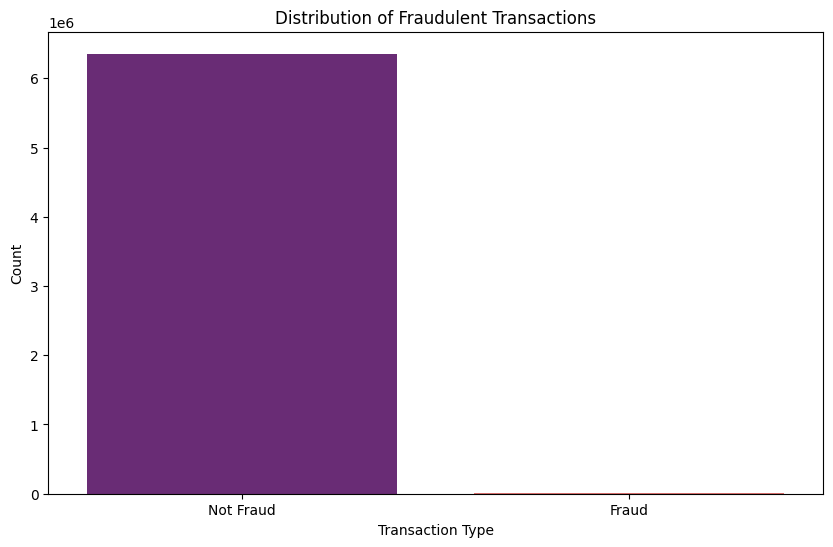

In [41]:
fraud_counts=df["isFraud"].value_counts()
print(fraud_counts)
plt.figure(figsize=(10, 6))
sns.barplot(x=fraud_counts.index, y=fraud_counts.values, palette="magma")
plt.xticks([0, 1], ["Not Fraud", "Fraud"])
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.title("Distribution of Fraudulent Transactions")
plt.show()

In [42]:
fraud_by_type = df.groupby("type")["isFraud"].mean().sort_values(ascending=False)
print(fraud_by_type)

type
TRANSFER    0.007688
CASH_OUT    0.001840
CASH_IN     0.000000
DEBIT       0.000000
PAYMENT     0.000000
Name: isFraud, dtype: float64


In [ ]:
df["type"] = df["type"].str.strip().str.upper()
df["type"] = df["type"].map({
    "CASH_OUT": 1, 
    "PAYMENT": 2,                              
    "CASH_IN": 3,
    "TRANSFER": 4,
    "DEBIT": 5
})


df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,2,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,2,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,4,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,2,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [44]:
import numpy as np 

x = np.array(df[["type", "amount", "oldbalanceOrg", "newbalanceOrig"]])

y = np.array(df[["isFraud"]])

Data preprocessing and Machine Learning

In [45]:

fraud = df[df["isFraud"] == 1]
non_fraud = df[df["isFraud"] == 0].sample(n=len(fraud), random_state=42)

balanced_df = pd.concat([fraud, non_fraud])
balanced_df = balanced_df.sample(frac=1, random_state=42)  # karıştır



=== Random Forest ===
              precision    recall  f1-score   support

           0     0.8810    0.9008    0.8908      1643
           1     0.8985    0.8783    0.8883      1643

    accuracy                         0.8895      3286
   macro avg     0.8897    0.8895    0.8895      3286
weighted avg     0.8897    0.8895    0.8895      3286



c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\core.py:158: UserWarning: [16:11:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



=== XGBoost ===
              precision    recall  f1-score   support

           0     0.8989    0.9148    0.9068      1643
           1     0.9133    0.8971    0.9051      1643

    accuracy                         0.9060      3286
   macro avg     0.9061    0.9060    0.9060      3286
weighted avg     0.9061    0.9060    0.9060      3286


=== Logistic Regression ===
              precision    recall  f1-score   support

           0     0.8692    0.7967    0.8314      1643
           1     0.8124    0.8801    0.8449      1643

    accuracy                         0.8384      3286
   macro avg     0.8408    0.8384    0.8381      3286
weighted avg     0.8408    0.8384    0.8381      3286


=== Karşılaştırma Tablosu ===
                     Accuracy  Precision    Recall  F1-Score   ROC-AUC
Model                                                                 
Random Forest        0.889531   0.898506  0.878271  0.888273  0.959157
XGBoost              0.905965   0.913259  0.897139  0.90

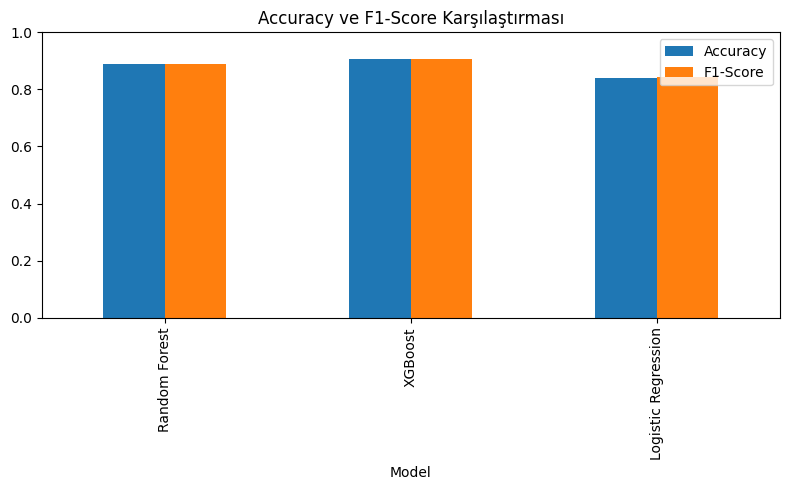


✅ En iyi model: XGBoost (F1=0.9051) -> 'best_model.pkl' kaydedildi


In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, classification_report)
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import joblib

# ------------------------------
# 1) Veri: sadece güvenli sütunlar
# ------------------------------
USE_COLUMNS = ["type", "amount", "step"]

# RF ve XGB için doğrudan kullanılacak
X_base = balanced_df[USE_COLUMNS].copy()
y = balanced_df["isFraud"].astype(int)

# Logistic Regression için one-hot encoding
X_lr = pd.get_dummies(X_base, columns=["type"], prefix="type")

# ------------------------------
# 2) Train/Test böl
# ------------------------------
X_train_base, X_test_base, y_train, y_test = train_test_split(
    X_base, y, test_size=0.20, random_state=42, stratify=y
)

X_train_lr, X_test_lr, _, _ = train_test_split(
    X_lr, y, test_size=0.20, random_state=42, stratify=y
)

# ------------------------------
# 3) Modeller
# ------------------------------
models = {
    "Random Forest": (RandomForestClassifier(n_estimators=300, random_state=42, n_jobs=-1),
                      X_train_base, X_test_base),
    "XGBoost": (XGBClassifier(
        use_label_encoder=False, eval_metric="logloss",
        n_estimators=500, learning_rate=0.06, max_depth=6,
        subsample=0.9, colsample_bytree=0.9, random_state=42, n_jobs=-1
    ), X_train_base, X_test_base),
    "Logistic Regression": (LogisticRegression(max_iter=2000, random_state=42),
                            X_train_lr, X_test_lr)
}

# ------------------------------
# 4) Eğitim, tahmin, metrikler
# ------------------------------
results = []

for name, (model, X_tr, X_te) in models.items():
    model.fit(X_tr, y_train)
    y_pred = model.predict(X_te)
    y_proba = model.predict_proba(X_te)[:, 1]
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_proba)

    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-Score": f1,
        "ROC-AUC": roc
    })

    print(f"\n=== {name} ===")
    print(classification_report(y_test, y_pred, digits=4))

# ------------------------------
# 5) Karşılaştırma Tablosu
# ------------------------------
results_df = pd.DataFrame(results).set_index("Model")
print("\n=== Karşılaştırma Tablosu ===")
print(results_df)

# ------------------------------
# 6) Görselleştirme
# ------------------------------
results_df[["Accuracy", "F1-Score"]].plot(kind="bar", figsize=(8,5))
plt.title("Accuracy ve F1-Score Karşılaştırması")
plt.ylim(0,1)
plt.tight_layout()
plt.show()

# ------------------------------
# 7) En iyi modeli kaydet (F1'e göre)
# ------------------------------
best_name = results_df["F1-Score"].idxmax()
best_model = models[best_name][0]
joblib.dump(best_model, "best_model.pkl")
print(f"\n✅ En iyi model: {best_name} (F1={results_df.loc[best_name,'F1-Score']:.4f}) -> 'best_model.pkl' kaydedildi")



=== Random Forest ===
Confusion Matrix:
[[1483  160]
 [ 203 1440]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      1643
           1       0.90      0.88      0.89      1643

    accuracy                           0.89      3286
   macro avg       0.89      0.89      0.89      3286
weighted avg       0.89      0.89      0.89      3286



c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\core.py:158: UserWarning: [15:37:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



=== XGBoost ===
Confusion Matrix:
[[1495  148]
 [ 158 1485]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.91      0.91      1643
           1       0.91      0.90      0.91      1643

    accuracy                           0.91      3286
   macro avg       0.91      0.91      0.91      3286
weighted avg       0.91      0.91      0.91      3286


=== Logistic Regression ===
Confusion Matrix:
[[1309  334]
 [ 197 1446]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.80      0.83      1643
           1       0.81      0.88      0.84      1643

    accuracy                           0.84      3286
   macro avg       0.84      0.84      0.84      3286
weighted avg       0.84      0.84      0.84      3286



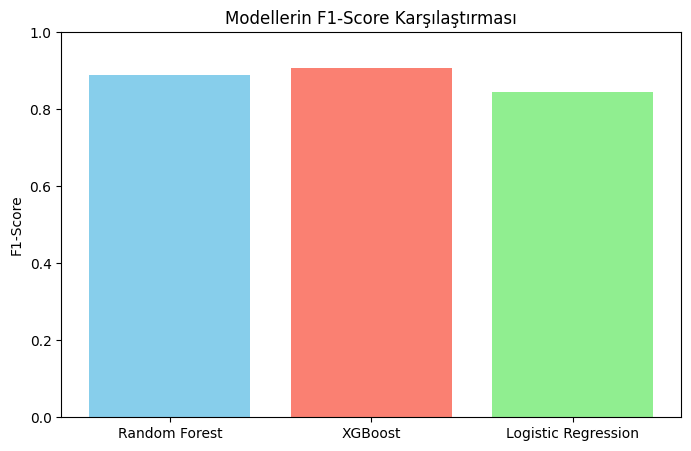

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import pandas as pd
import matplotlib.pyplot as plt

# 1️⃣ Dengelenmiş veri setinden X ve y oluştur
X = balanced_df.drop([
    "isFraud",          
    "isFlaggedFraud",   
    "nameOrig",         
    "nameDest",         
    "oldbalanceOrg", 
    "newbalanceOrig", 
    "oldbalanceDest", 
    "newbalanceDest"
], axis=1)

X = pd.get_dummies(X, columns=['type'], prefix='type')
y = balanced_df['isFraud']

# 2️⃣ Eğitim ve test setine böl
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3️⃣ Modelleri oluştur
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42)
}

# 4️⃣ Modelleri eğit ve F1-score kaydet
f1_scores = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    f1_scores[name] = f1
    print(f"\n=== {name} ===")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

# 5️⃣ F1-score karşılaştırma grafiği
plt.figure(figsize=(8,5))
plt.bar(f1_scores.keys(), f1_scores.values(), color=['skyblue','salmon','lightgreen'])
plt.title('Modellerin F1-Score Karşılaştırması')
plt.ylabel('F1-Score')
plt.ylim(0,1)
plt.show()


In [30]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, classification_report, confusion_matrix
import pandas as pd
import joblib

# 1️⃣ Dengelenmiş veri setinden X ve y oluştur
X = balanced_df.drop([
    "isFraud",          
    "isFlaggedFraud",   
    "nameOrig",         
    "nameDest",         
    "oldbalanceOrg", 
    "newbalanceOrig", 
    "oldbalanceDest", 
    "newbalanceDest"
], axis=1)

X = pd.get_dummies(X, columns=['type'], prefix='type')
y = balanced_df['isFraud']

# 2️⃣ Eğitim ve test setine böl
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3️⃣ XGBoost modelini oluştur ve eğit
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# 4️⃣ Model performansını kontrol et
y_pred = xgb_model.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))

# 5️⃣ Modeli kaydet
joblib.dump(xgb_model, "xgb_fraud_model.pkl")
print("XGBoost modeli kaydedildi: xgb_fraud_model.pkl")


Confusion Matrix:
[[1495  148]
 [ 158 1485]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.91      0.91      1643
           1       0.91      0.90      0.91      1643

    accuracy                           0.91      3286
   macro avg       0.91      0.91      0.91      3286
weighted avg       0.91      0.91      0.91      3286

F1-Score: 0.9065934065934066
XGBoost modeli kaydedildi: xgb_fraud_model.pkl


c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\core.py:158: UserWarning: [15:37:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
